# Australia Car Market Data
Gerasimov I.D.

## Description
This dataset provides detailed information about the car market in Australia, including attributes such as car code, car name, car price, car brand, car model year, gearbox type, design type, fuel type, car condition, mileage, engine capacity, car color, and seating capacity. It is a rich source of data that helps explore trends and dynamics in the Australian car market, supporting analysis and decision-making in the automotive industry.

## Objectives of the analysis:
- Identify key factors affecting the price of a car to offer pricing or purchase recommendations.
- Identification of popular models and market segments based on characteristics such as body type, make and model of the car.
- Study of the influence of mileage and condition of the car on its price to identify dependence.
- Development of a model for predicting the cost of a car based on historical data and characteristics of the car.

## Questions for deeper data analysis:
1) How do the prices of cars vary depending on their make and year of manufacture?
    - It is interesting to see the distribution of prices by make and model of cars to identify premium segments or the most popular models.
2) How does the mileage of a car affect its price?
    - A study of the relationship between mileage (Kilometers) and price (Price) can show how significantly the price of a car decreases with increasing mileage.

## Importing libraries

In [52]:
# Для анализа данных и обработки
import pandas as pd
import numpy as np

# Для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Для машинного обучения и статистики
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy

# Для математических операций
from math import factorial, comb

## Column description
- ID: Card code
- Name: The name of the car
- Price: The cost of the car
- Brand: Car brand
- Model: The year of manufacture of the car
- Variant: A variant of the car
- Series: Car series
- Year: The year of manufacture of the car
- Gearbox: Transmission type
- Type: Body structure
- Fuel: Fuel type
- Status: Vehicle status
- Kilometers: Mileage
- CC: Engine capacity
- Color: Car color
- Seating Capacity: Number of seats

# 1. 🐝 Data Analysis

## Initial inspection and data preparation
For effective data analysis, it is necessary to conduct an initial inspection, which includes obtaining general information about the data structure, calculating descriptive statistics, analyzing categorical variables and checking for missing values. These steps allow you to identify potential problems and prepare data for further analysis.

In [53]:
df = pd.read_csv('cars_info.csv')
df.head()

,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,11530130,2010 Toyota Rukus Build 2 AZE151R,9999,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
1,12190570,2021 Mercedes-Benz V 250 D Avantgarde MWB 447 ...,117990,Mercedes-Benz,V,250 D Avantgarde MWB,447 MY21,2021,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7
2,12321855,2021 Mercedes-Benz Valente 116 CDI MWB RWD 447...,79990,Mercedes-Benz,Valente,116 CDI MWB RWD,447 MY21,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8
3,12346971,2010 Mercedes-Benz E250 CDI Avantgarde 207,34990,Mercedes-Benz,E250,CDI Avantgarde,207,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
4,12363884,2016 Holden Cruze CD JH MY16,15990,Holden,Cruze,CD,JH MY16,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5


In [54]:
# Getting general information about the dataset: number of rows, columns, data types
print("\n General information about the dataset:")
print(df.info ())

# Getting statistics on numeric columns
print("\n Descriptive statistics for numeric data:")
print(df.describe())

# View unique values for categorical columns (e.g. car brand)
print("\n Unique values in the 'Brand' column:")
print(df['Brand'].unique())

# Check for missing values
print("\n Check for missing values:")
print(df.isnull().sum())


 General information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17048 entries, 0 to 17047
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                17048 non-null  int64 
 1   Name              17048 non-null  object
 2   Price             17048 non-null  int64 
 3   Brand             17048 non-null  object
 4   Model             17048 non-null  object
 5   Variant           17048 non-null  object
 6   Series            17048 non-null  object
 7   Year              17048 non-null  int64 
 8   Kilometers        17048 non-null  int64 
 9   Type              17048 non-null  object
 10  Gearbox           17048 non-null  object
 11  Fuel              17048 non-null  object
 12  Status            17048 non-null  object
 13  CC                17048 non-null  int64 
 14  Color             17048 non-null  object
 15  Seating Capacity  17048 non-null  int64 
dtypes: int64(6), obje

**Conclusion based on the results of the initial inspection and data preparation**:

1. **General information about the dataset**:
- The dataset consists of 16 columns and 17,048 records.
   - Data types include numeric (6 columns of type `int64`) and string (`object`) data.
   - The memory size occupied by this set is 2.1+ MB.
   - There are no missing values in the dataset, which simplifies further analysis.

2. **Descriptive statistics**:
- The fields `Price`, `Year`, `Kilometers`, `CC` and `Seating Capacity` have significant variability, which is important to take into account when modeling and analyzing.
   - `Price`: the minimum price is 1000, the maximum is 999,000, which indicates a wide range of car prices.
   - `Year': Cars vary by year of manufacture from 1989 to 2022.
   - `Kilometers`: One car has a mileage of only 1 km, and the maximum mileage is 2.7 million km, which indicates possible anomalies or unique cases.
   - `CC`: varies from 875 to 7300 cubic centimeters, which indicates a difference in engine types.
   - The seating capacity varies from 2 to 14, which reflects the availability of both small cars and minibuses.

3. **Categorical variables**:
- The `Brand' column contains 57 unique car brands, which may require grouping or creating dummy variables for car models in further analysis.

4. **Checking for missing values**:
- There are no missing values, which indicates high-quality data preparation for analysis.

## Visualization of price distribution by category
Data visualization plays a key role in analyzing the distribution of car prices across different categories. Building graphs such as boxplot and density charts allows businesses to estimate price spread, identify emissions, and understand how vehicle characteristics such as make, body type, and fuel type affect cost.

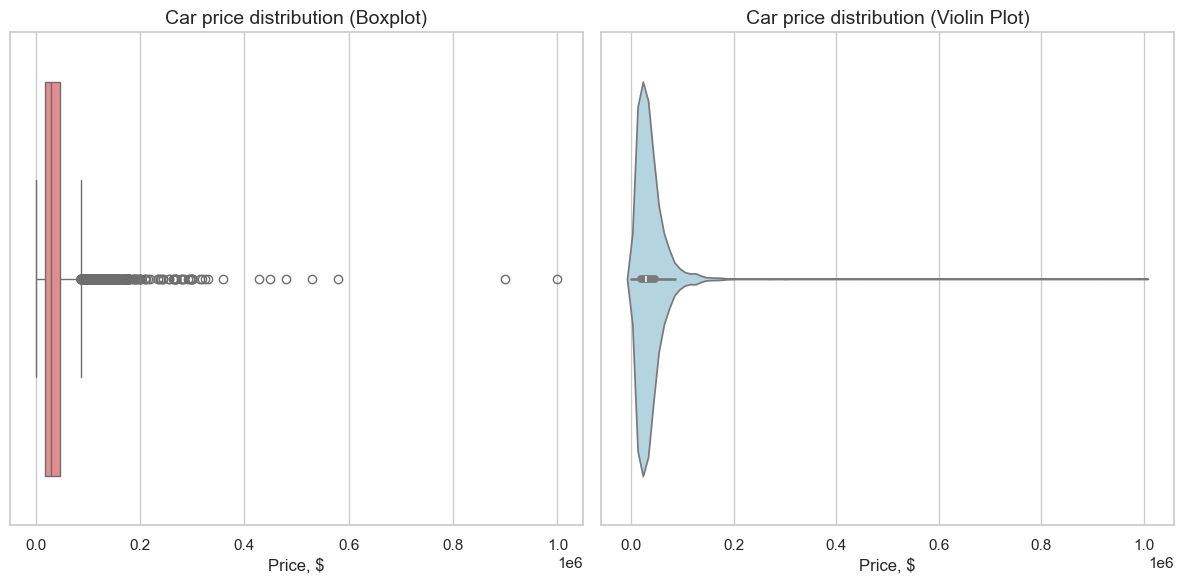

In [55]:
# Customize the style
sns.set(style="whitegrid")

# Creating a shape
plt.figure(figsize=(12, 6))

#1. Boxplot — a box with a mustache
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Price'], color='lightcoral')
plt.title('Car price distribution (Boxplot)', fontsize=14)
plt.xlabel('Price, $', fontsize=12)

# 2. Violin Plot — a violin graph for a more detailed distribution
plt.subplot(1, 2, 2)
sns.violinplot(x=df['Price'], color='lightblue')
plt.title('Car price distribution (Violin Plot)', fontsize=14)
plt.xlabel('Price, $', fontsize=12)

# Displaying both graphs
plt.tight_layout()
plt.show()

**Analysis of Graphs:**

1. **Boxplot:**
   - **Central Tendency:** Most of the data is concentrated in the lower price range (up to 100,000 dollars), reflecting the average price level of the cars.
   - **Outliers:** Numerous points located far beyond the main distribution (above 200,000 dollars) are outliers, which may indicate the presence of luxury or unique cars with high prices in the sample.
   - **Price Range:** The majority of the data is up to approximately 100,000 dollars, as seen by the compression of the box at the bottom of the plot.
   - **Median:** The line in the middle of the box represents the median price, which also falls within the lower price range.

2. **Violin Plot:**
   - **Distribution Shape:** The distribution of car prices is heavily skewed to the left, confirming the presence of a large number of cars with lower prices (up to 100,000 dollars). The upper part of the violin narrows, indicating fewer cars in the higher price categories.
   - **Distribution Details:** The inner distribution shows data density within up to 100,000 dollars, indicating that most cars are in this price segment.
   - **Outliers:** As with the boxplot, significant outliers are visible at the right end of the plot, confirming the presence of extremely high prices.

**Conclusion:**
Both graphs confirm that the dataset contains a significant number of cars with low prices (up to 100,000 dollars), while luxury or rare cars create outliers, with prices up to 500,000 dollars. Analyzing these outliers can help segment the cars into categories for a more in-depth investigation of the factors affecting price.

## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) helps identify patterns and relationships in the data. Histograms, scatter plots, and heat maps assist in understanding how variables, such as mileage or year of manufacture, impact car prices, as well as analyzing the distribution of categorical features, such as body type and fuel type.

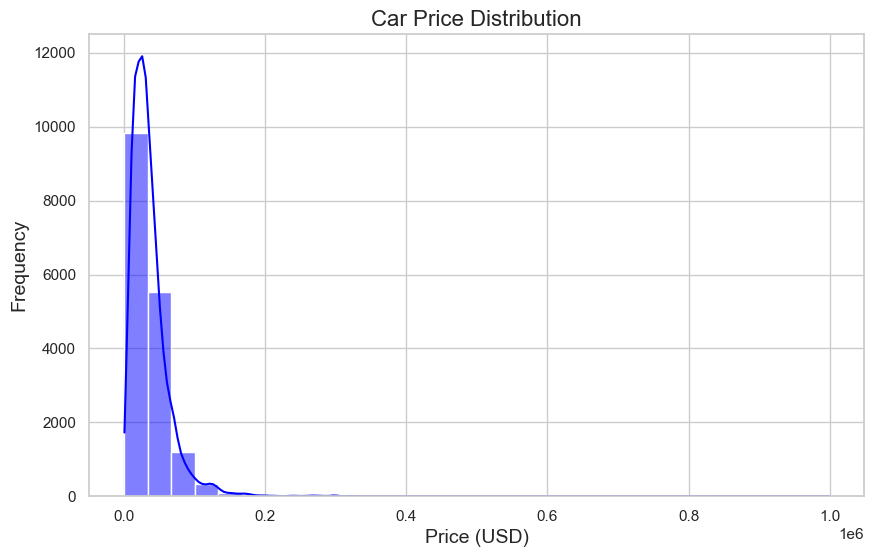

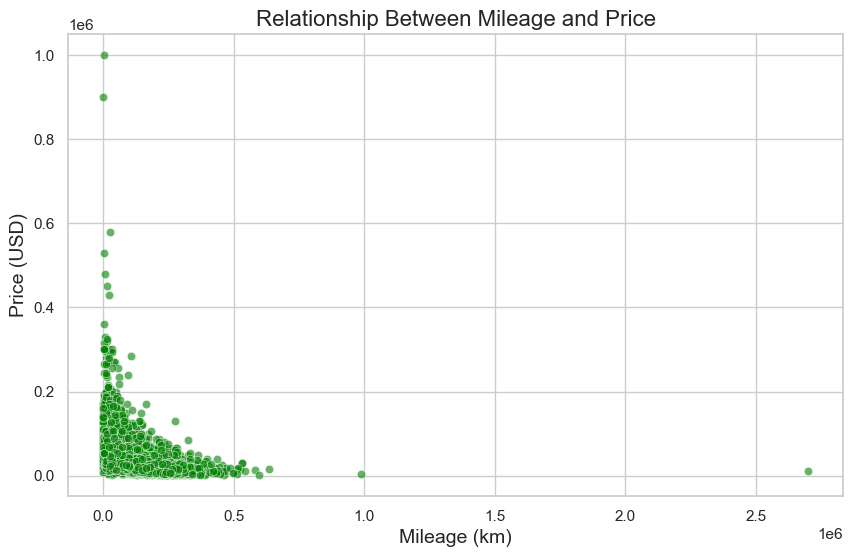

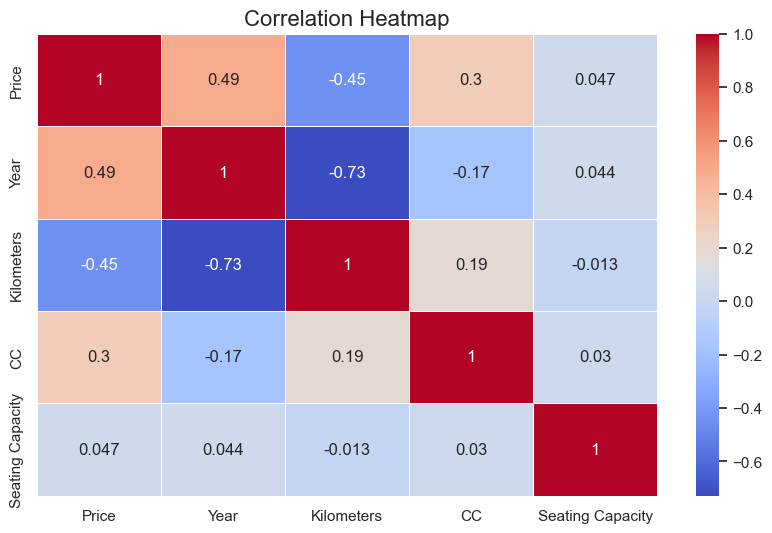

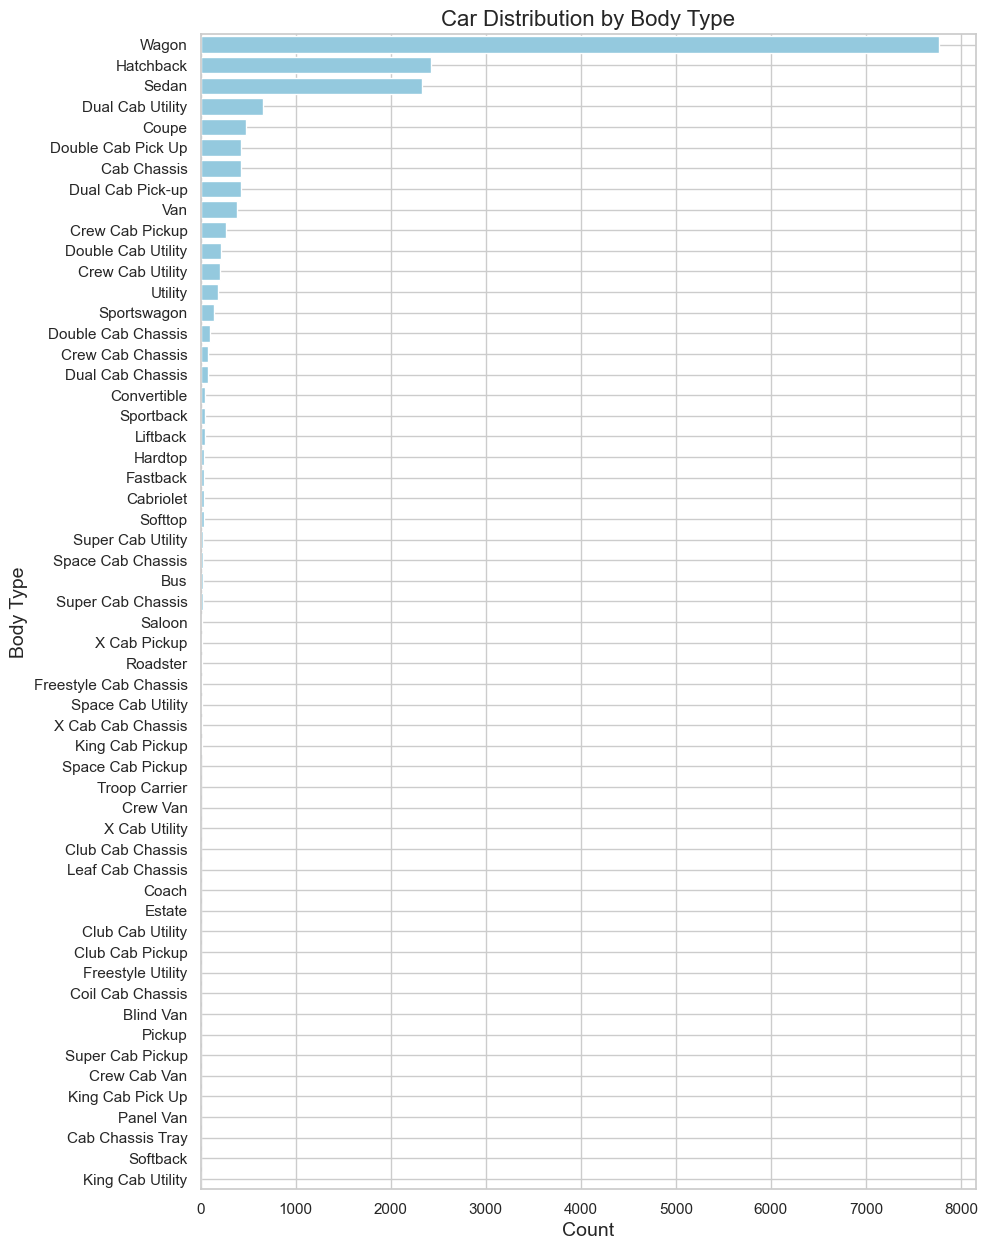

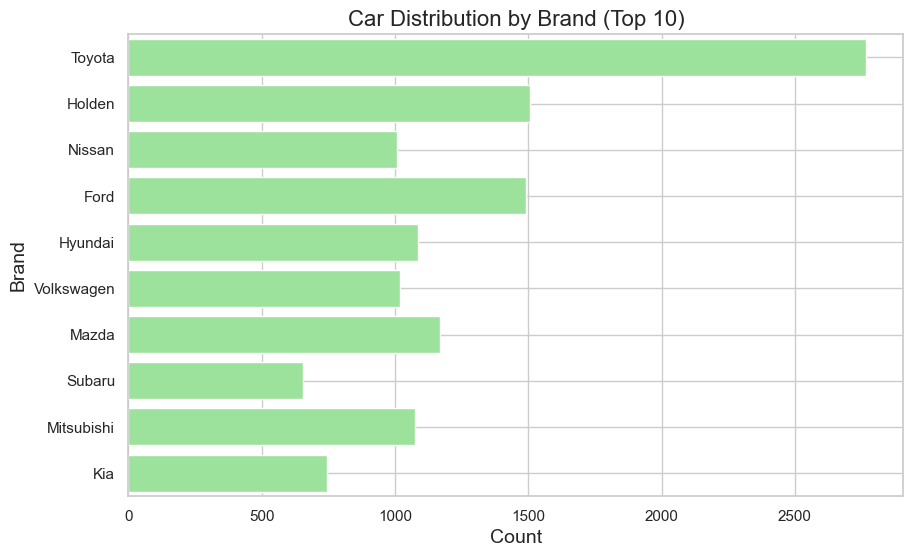

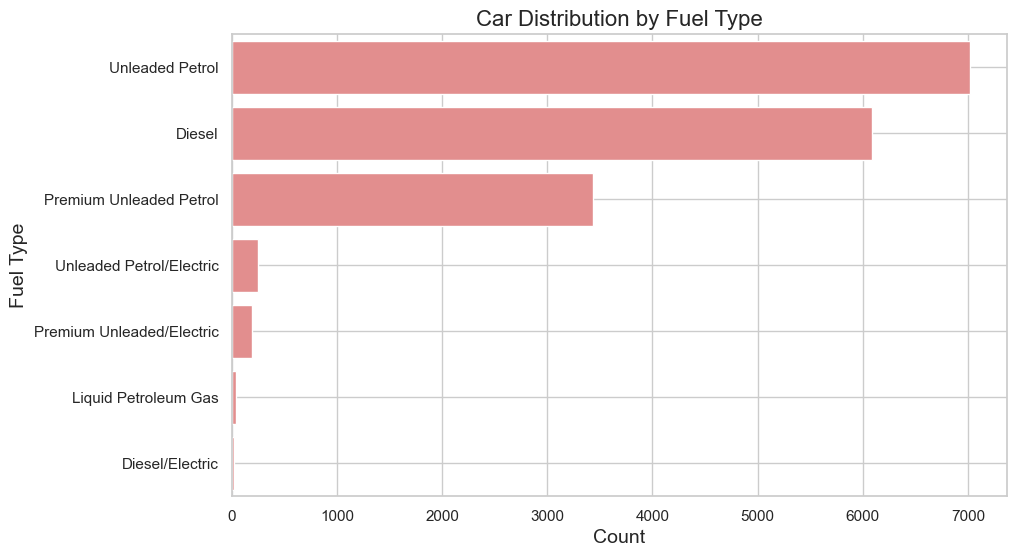

In [56]:
# 1. Histogram for price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True, color='blue')
plt.title('Car Price Distribution', fontsize=16)
plt.xlabel('Price (USD)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

# 2. Scatter plot: price vs mileage (Kilometers)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Kilometers', y='Price', data=df, color='green', alpha=0.6)
plt.title('Relationship Between Mileage and Price', fontsize=16)
plt.xlabel('Mileage (km)', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.grid(True)
plt.show()

# 3. Heatmap of correlations between numerical variables
plt.figure(figsize=(10, 6))
corr_matrix = df[['Price', 'Year', 'Kilometers', 'CC', 'Seating Capacity']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# 4. Visualization of categorical variables

# 4.1. Body Type
plt.figure(figsize=(10, 15))
sns.countplot(y='Type', data=df, order=df['Type'].value_counts().index, color='skyblue')
plt.title('Car Distribution by Body Type', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Body Type', fontsize=14)
plt.grid(True)
plt.show()

# 4.2. Brand
plt.figure(figsize=(10, 6))
top_brands = df['Brand'].value_counts().nlargest(10).index  # Top 10 brands
sns.countplot(y='Brand', data=df[df['Brand'].isin(top_brands)], color='lightgreen')
plt.title('Car Distribution by Brand (Top 10)', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Brand', fontsize=14)
plt.grid(True)
plt.show()

# 4.3. Fuel Type
plt.figure(figsize=(10, 6))
sns.countplot(y='Fuel', data=df, order=df['Fuel'].value_counts().index, color='lightcoral')
plt.title('Car Distribution by Fuel Type', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Fuel Type', fontsize=14)
plt.grid(True)
plt.show()

### Description of the Photos:

1. **Histogram of Price Distribution and Scatter Plot (Mileage vs. Price):**
   - **Histogram** of price distribution shows that the vast majority of cars are priced below 100,000 dollars, with a sharp decline in frequency beyond this threshold.
   - **Scatter Plot** demonstrates a negative correlation between mileage and price: cars with higher mileage generally have lower prices. Additionally, it is observed that cars with mileage up to 500,000 km exhibit a significantly wider price distribution.

2. **Heatmap of Correlations:**
   - **Correlation** between variables shows:
     - A moderate positive correlation between price and year of manufacture (0.52) and a negative correlation between price and mileage (-0.48).
     - Mileage of the car is most strongly correlated with the year of manufacture (-0.73), which is expected as older cars typically have higher mileage.

3. **Categorical Variables:**
   - **Body Type:** The most popular body types are "Wagon," "Hatchback," and "Sedan," reflecting market preferences.
   - **Brand (Top 10):** The most common car brands are Toyota, Holden, and Nissan. These brands dominate the market in terms of the number of cars in the sample.
   - **Fuel Type:** The primary fuel types are unleaded gasoline and diesel. Electric vehicles and hybrids represent a small portion of the sample, which may reflect current trends towards ecology and the shift to alternative fuel types.

### General Conclusion:
- The visualizations confirm key findings: most cars are priced below 100,000 dollars, and there is a strong correlation between mileage, year of manufacture, and price. Categorical variables (such as body type and fuel type) also significantly impact the distribution of cars in the market.

## Visualization of Price Distribution by Categories

Advanced visualization methods are used to analyze the impact of various factors on car prices. Boxplots for brands, body types, and fuel types allow for the observation of price distribution within each category. Kernel Density Estimation (KDE) histograms help visualize where the primary price ranges are concentrated for each group, making it easier to make business decisions.

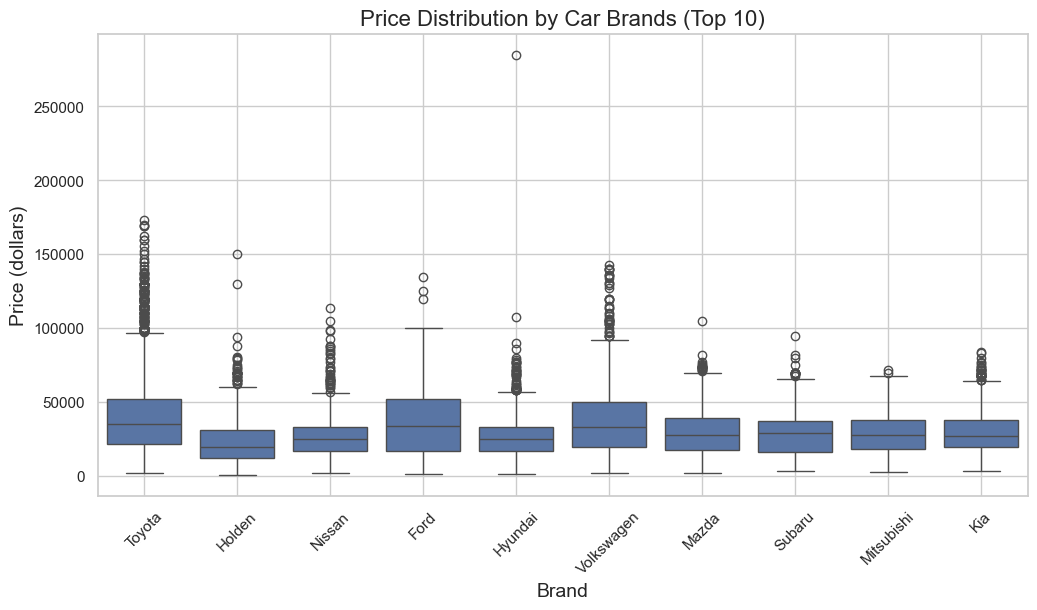

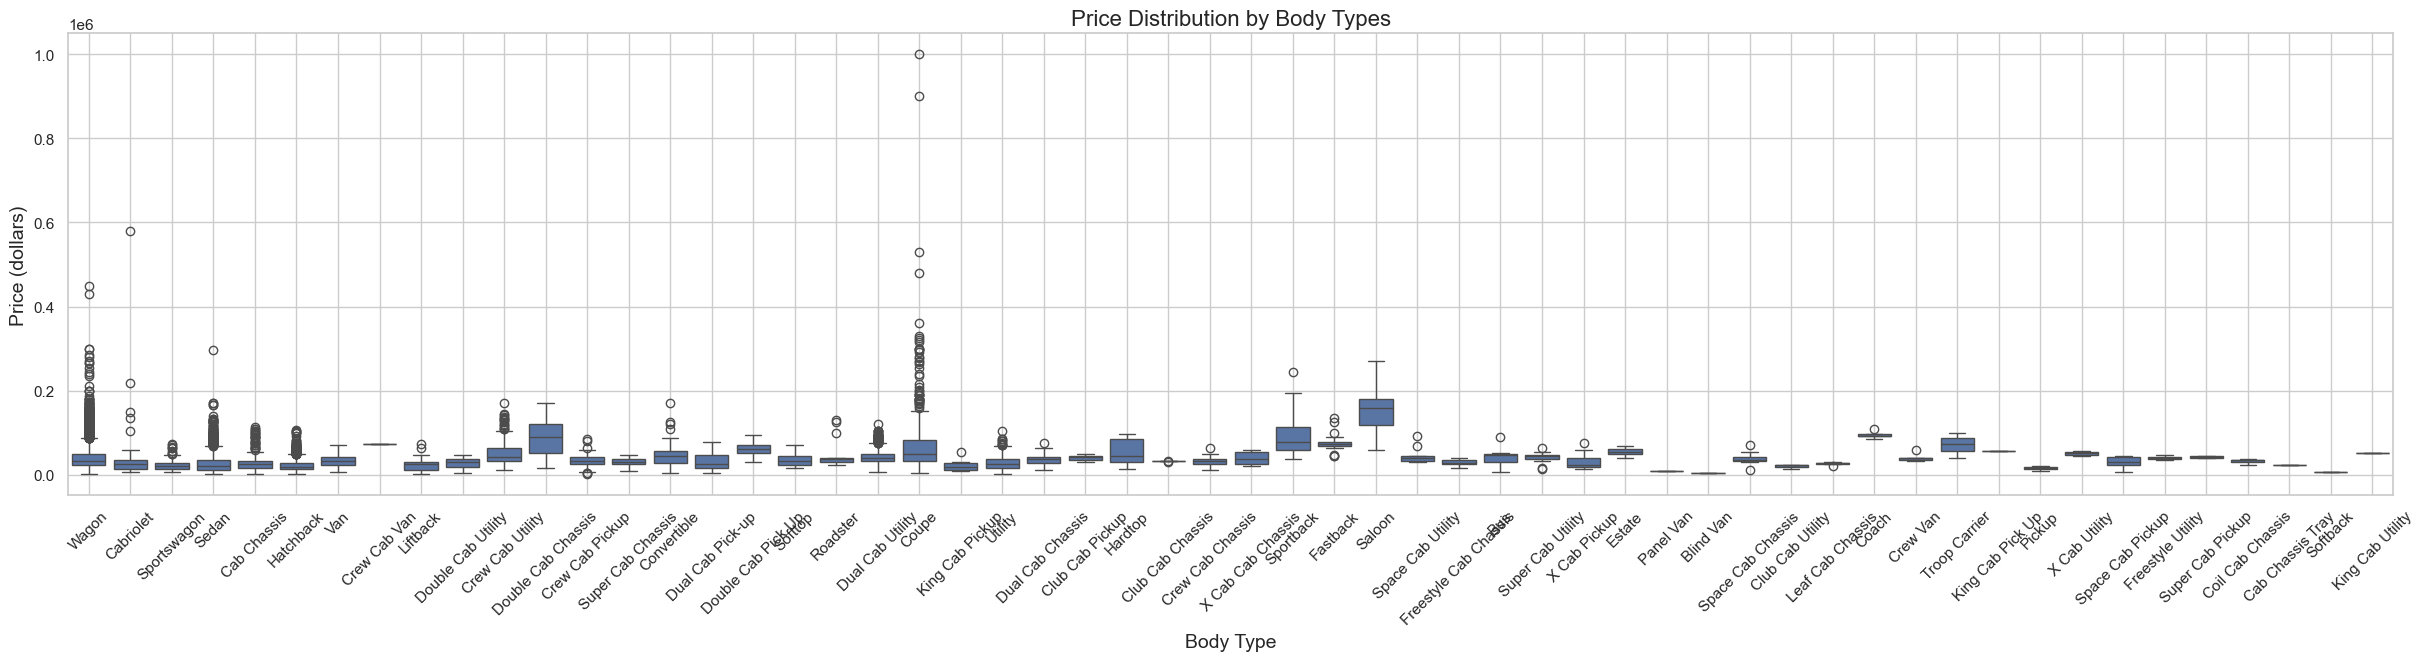

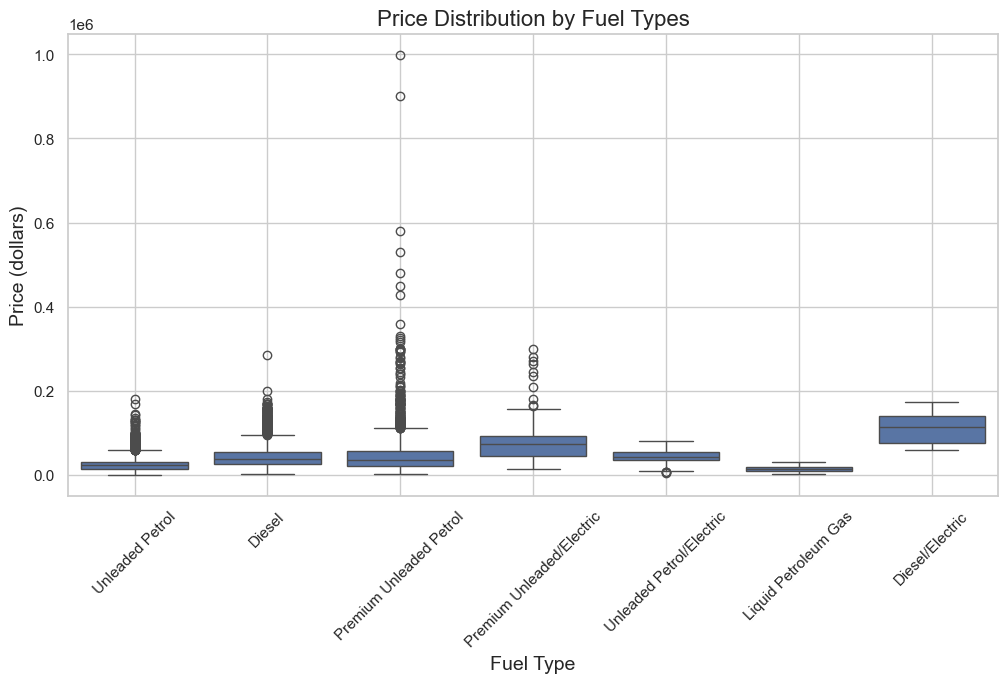

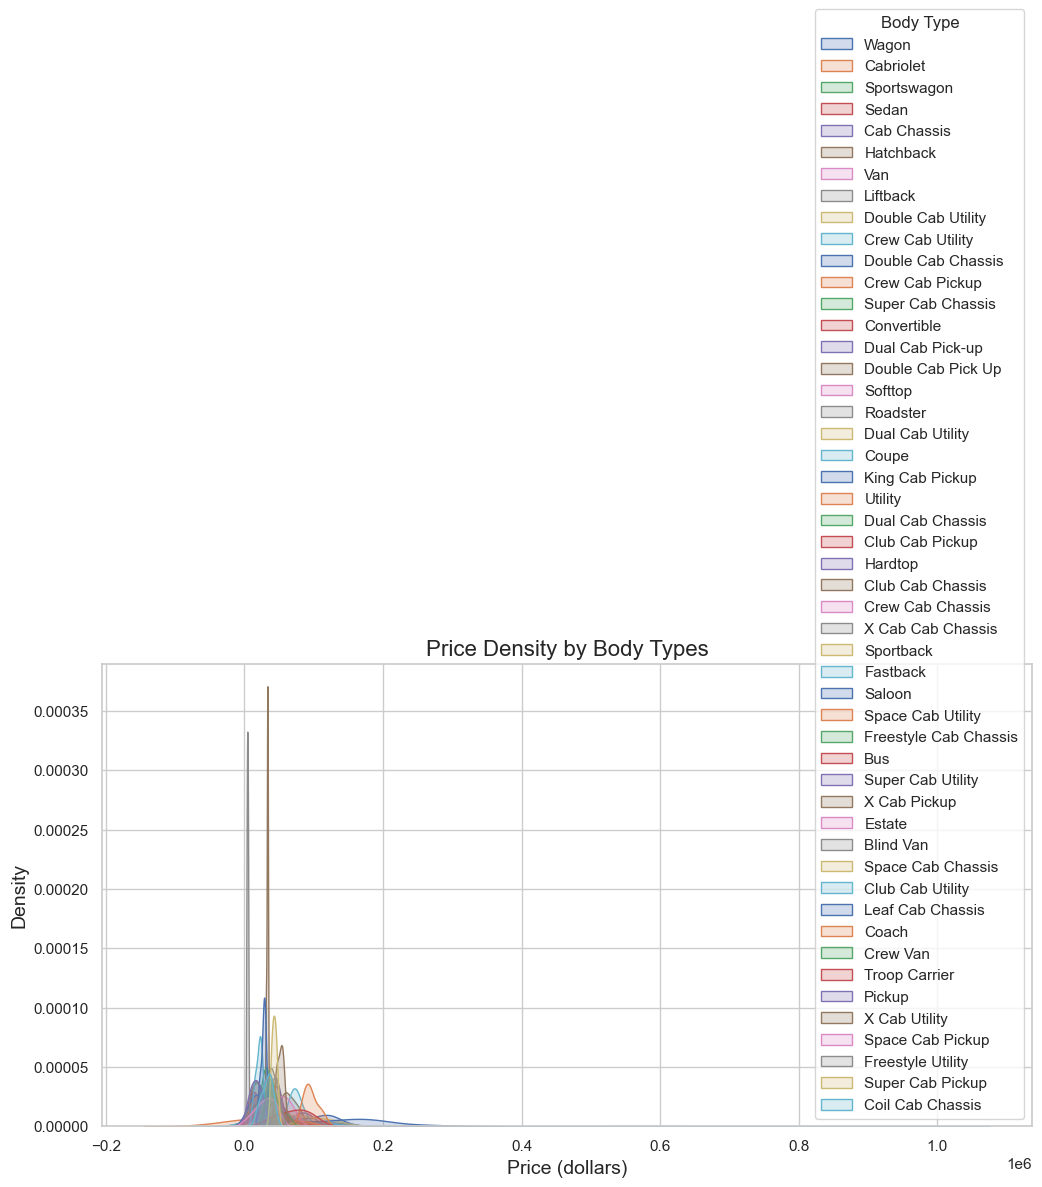

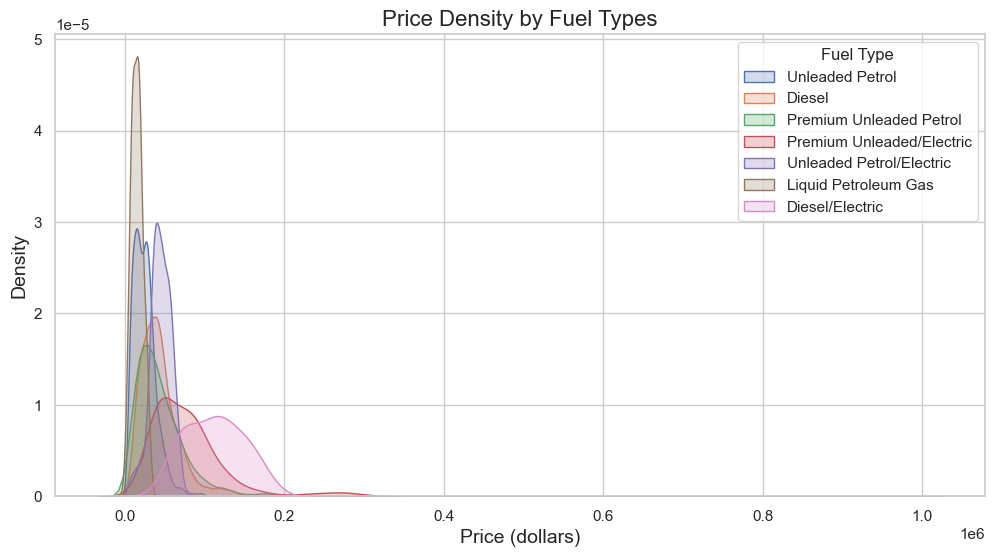

In [57]:
# Set plot style
sns.set(style="whitegrid")

# 1. Boxplot for price distribution by car brands
plt.figure(figsize=(12, 6))
top_brands = df['Brand'].value_counts().nlargest(10).index  # Top 10 brands
sns.boxplot(x='Brand', y='Price', data=df[df['Brand'].isin(top_brands)])
plt.title('Price Distribution by Car Brands (Top 10)', fontsize=16)
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Price (dollars)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 2. Boxplot for price distribution by body types
plt.figure(figsize=(30, 6))
sns.boxplot(x='Type', y='Price', data=df)
plt.title('Price Distribution by Body Types', fontsize=16)
plt.xlabel('Body Type', fontsize=14)
plt.ylabel('Price (dollars)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 3. Boxplot for price distribution by fuel types
plt.figure(figsize=(12, 6))
sns.boxplot(x='Fuel', y='Price', data=df)
plt.title('Price Distribution by Fuel Types', fontsize=16)
plt.xlabel('Fuel Type', fontsize=14)
plt.ylabel('Price (dollars)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 4. Histogram with density overlay for prices by body type
plt.figure(figsize=(12, 6))
for body_type in df['Type'].unique():
    # Check for variability
    if df[df['Type'] == body_type]['Price'].var() > 0:
        sns.kdeplot(df[df['Type'] == body_type]['Price'], label=body_type, fill=True)
plt.title('Price Density by Body Types', fontsize=16)
plt.xlabel('Price (dollars)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title='Body Type')
plt.grid(True)
plt.show()

# 5. Histogram with density overlay for prices by fuel type
plt.figure(figsize=(12, 6))
for fuel_type in df['Fuel'].unique():
    # Check for variability
    if df[df['Fuel'] == fuel_type]['Price'].var() > 0:
        sns.kdeplot(df[df['Fuel'] == fuel_type]['Price'], label=fuel_type, fill=True)
plt.title('Price Density by Fuel Types', fontsize=16)
plt.xlabel('Price (dollars)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title='Fuel Type')
plt.grid(True)
plt.show()

### Key Insights for Business:

1. **Price by Car Brands:**
   - **Toyota** and **Volkswagen** lead in price, showing high demand and prestige.
   - **Ford** has the most listings, reflecting wide availability.
   - **Hyundai**, **Kia**, and **Mazda** offer strong mid-range value for money.
   - **Holden** has the lowest prices, appealing to budget buyers.

2. **Price by Body Types:**
   - **Sedans** and **hatchbacks** dominate the market, with sedans priced at 27,000 dollars and hatchbacks at 21,800 dollars.
   - Luxury body types like **coupe** and **convertibles** exceed 73,000 dollars, targeting high-income buyers.
   - **SUVs** and **pickups** also command higher prices, suiting family and commercial needs.

3. **Price by Fuel Types:**
   - **Diesel** cars are the most expensive (43,480 dollars) due to efficiency.
   - **Hybrid** cars, especially diesel-electric, average 112,000 dollars, placing them in the premium segment.
   - **LPG** cars are budget-friendly, priced at 14,700 dollars.

### Business Recommendations:
   - Focus on **Ford**, **Hyundai**, and **Holden** for budget-conscious and mass-market customers.
   - Expand premium offerings of **Toyota**, **Volkswagen**, and luxury body types for high-end consumers.
   - Promote **hybrid** and **diesel** vehicles for eco-conscious and commercial buyers.

## Car Clustering by Features
The K-means algorithm helps to segment cars into groups with similar characteristics. This process includes selecting key features, standardizing the data, and applying the algorithm for clustering. Visualizing the results through PCA (Principal Component Analysis) provides a clear view of how clusters are distributed. This approach is useful for customer segmentation and targeted marketing.

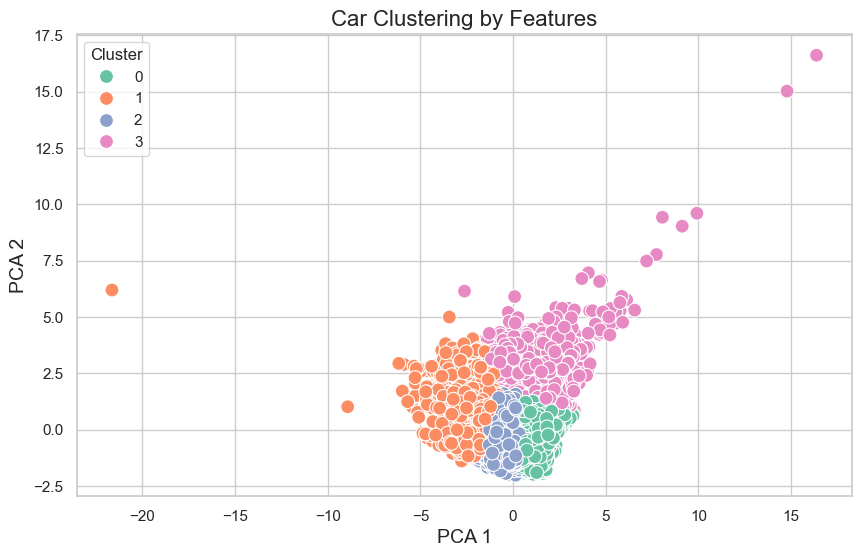

In [58]:
# Selecting key features for clustering
features = ['Price', 'Year', 'Kilometers', 'CC']

# Removing rows with missing values in these features
df_clean = df[features].dropna()

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean)

# Applying K-means algorithm for clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Clustering into 4 groups
df_clean['Cluster'] = kmeans.fit_predict(scaled_data)

# Transforming data using PCA for 2D visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

df_clean['PCA1'] = pca_components[:, 0]
df_clean['PCA2'] = pca_components[:, 1]

# Visualizing clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_clean, palette='Set2', s=100)
plt.title('Car Clustering by Features', fontsize=16)
plt.xlabel('PCA 1', fontsize=14)
plt.ylabel('PCA 2', fontsize=14)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

### Summary:

1. **Cluster Distribution:**
   - **Cluster 0 (Price):** 42% of cars, newer models (2019), low mileage, 47,000 dollars average price.
   - **Cluster 2 (Year):** 40% of cars, 2014 models, mid-range prices (25,000 dollars), moderate mileage.
   - **Cluster 1 (Kilometers):** 18%, older cars (2007), high mileage, low prices (15,000 dollars).
   - **Cluster 3 (CC):** 6%, luxury cars with a large engine size, 108,000 dollars average price.

2. **Average Characteristics:**
   - **Cluster 0 (Price):** Cars with 40,000 km mileage and an engine size of 2,215 cc.
   - **Cluster 1 (Year):** Older, larger cars with 222,000 km mileage and 2,904 cc engine.
   - **Cluster 2 (Kilometers):** Mid-range cars with 120,000 km mileage and 2,300 cc engine.
   - **Cluster 3 (CC):** Luxury cars with 57,000 km mileage and 4,486 cc engine.

### Conclusion:
The clustering analysis divides the cars into four distinct segments based on price, age, and mileage. Cluster 0 represents modern mid-range vehicles suitable for the mass market, while Cluster 3 includes luxury cars with high engine capacity. Clusters 1 and 2 cover older or budget-friendly options. This segmentation offers a clear strategy for targeting different customer groups, from budget-conscious buyers to high-end luxury customers.

# 2. 🐝 Let's Walk Through the Project Goals

### 1. Identifying Key Factors Affecting Car Price
To achieve this, a regression analysis needs to be conducted to determine the significance of factors such as: model year, mileage, engine size, brand, type of transmission, body type, fuel type, etc.

#### Correlation Analysis:

In [59]:
# Correlation analysis for numerical data
corr_matrix = df[['Price', 'Year', 'Kilometers', 'CC', 'Seating Capacity']].corr()
print("Correlation between numerical features and car price:")
print(corr_matrix['Price'])

Correlation between numerical features and car price:
Price               1.000000
Year                0.488033
Kilometers         -0.447490
CC                  0.298205
Seating Capacity    0.046629
Name: Price, dtype: float64


### Correlation Analysis

Correlation analysis helps determine which numerical features of cars have the most significant impact on their price. Here are the results of the correlation between car price and other numerical characteristics:

- **Year:** 0.488033
- **Kilometers:** -0.447490
- **Engine Capacity (CC):** 0.298205
- **Seating Capacity:** 0.046629

### Conclusions:

1. **Year:** 
   - The correlation with price is 0.488033, indicating a moderate positive relationship. This means that newer cars tend to be more expensive.

2. **Kilometers:**
   - The correlation with price is -0.447490, showing a moderate negative relationship. This suggests that cars with higher mileage are generally cheaper.

3. **Engine Capacity (CC):**
   - The correlation with price is 0.298205, indicating a weak positive relationship. Larger engines are generally associated with higher car prices, but this relationship is not very strong.

4. **Seating Capacity:**
   - The correlation with price is 0.046629, indicating a virtually non-existent relationship. The number of seats in a car does not have a significant impact on its price.

#### Regression model (with categorical features):

In [60]:
# Prepare data for regression analysis
X = df_clean[['Year', 'Kilometers', 'CC']]  # Features
y = df_clean['Price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict on test data
y_pred = regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

# Model coefficients (influence of each feature on the price)
coefficients = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
print("Regression Model Coefficients (impact of features on price):")
print(coefficients)

Mean Absolute Error (MAE): 12521.997580884641
R² Score: 0.4581600608578701
Regression Model Coefficients (impact of features on price):
            Coefficient
Year        2473.195316
Kilometers    -0.090953
CC            14.092950


### Key Insights from the Regression Model:

1. **Mean Absolute Error (MAE):**  
   The model's predictions deviate from actual prices by an average of 12,521 dollars, showing the level of accuracy in predicting vehicle prices.

2. **R-Squared (R²):**  
   The model explains 45.8% of price variation, leaving 54.2% unexplained, suggesting room for improvement or other influencing factors.

3. **Regression Coefficients:**
   - **Year:** Newer vehicles increase in price by 2,473 dollars per year, confirming a strong positive impact on price.
   - **Kilometers:** Higher mileage reduces the price by 0.09 dollars per kilometer, indicating that mileage significantly lowers vehicle value.
   - **Engine Capacity (CC):** A larger engine increases the price by 14 dollars per CC, but its impact is smaller than year or mileage.

### Business Recommendations:
   - **Focus on Year and Mileage:** Prioritize marketing newer vehicles with lower mileage to highlight their higher value.
   - **Leverage Engine Capacity:** For premium customers, promote vehicles with larger engines, though it has less influence on overall pricing.

### 2. Identification of popular models and market segments
For this analysis, we use data on the make, model, and body type.

In [61]:
# Top-10 most popular car brands
popular_brands = df['Brand'].value_counts().head(10)
print("Top-10 Most Popular Car Brands:")
print(popular_brands)

# Top-10 most popular car body types
popular_types = df['Type'].value_counts().head(10)
print("Top-10 Most Popular Car Body Types:")
print(popular_types)

# Top-10 most popular car models
popular_models = df['Model'].value_counts().head(10)
print("Top-10 Most Popular Car Models:")
print(popular_models)

Top-10 Most Popular Car Brands:
Brand
Toyota        2768
Holden        1505
Ford          1490
Mazda         1167
Hyundai       1087
Mitsubishi    1074
Volkswagen    1019
Nissan        1008
Kia            744
Subaru         655
Name: count, dtype: int64
Top-10 Most Popular Car Body Types:
Type
Wagon                 7768
Hatchback             2424
Sedan                 2325
Dual Cab Utility       657
Coupe                  471
Double Cab Pick Up     425
Cab Chassis            424
Dual Cab Pick-up       423
Van                    384
Crew Cab Pickup        269
Name: count, dtype: int64
Top-10 Most Popular Car Models:
Model
Ranger       648
Hilux        542
Commodore    491
Triton       368
Corolla      356
RAV4         307
Navara       306
Colorado     282
3            281
X-Trail      276
Name: count, dtype: int64


### Analysis of popular models and market segments

#### 1. **Top 3 popular car brands**
- **Toyota**: 2768
- **Holden**: 1505
- **Ford**: 1490

**Output:** Toyota is in the lead, followed by Holden and Ford.

#### 2. **Top 3 popular body types**
- **Wagon**: 7768
- **- **Hatchback**: 24
- **Sedan**: 2325

**Output:** Wagon and Hatchback are the most popular.

#### 3. **Top 3 popular car models**
- **Ranger**: 648
- **Hilux**: 542
- **Commodore**: 491

**Output:** Ranger and Hilux are in the top, SUVs and pickups are popular.

### Results:
- **Brands:** Toyota leads, Holden and Ford are also popular.
- **Body types:** Wagon and Hatchback are the most in demand.
- **Models:** Ranger and Hilux are in the first place, which highlights the interest in pickups and SUVs.

### 3. Investigation of the influence of mileage and condition of the car on its price
In this case, we add a Status factor for analysis.

In [62]:
# Analyzing the impact of mileage and condition on price
X_cond = df[['Kilometers', 'Status']]
X_cond = pd.get_dummies(X_cond, drop_first=True)  # Convert categorical data
y_cond = df['Price']

# Splitting into training and test sets
X_train_cond, X_test_cond, y_train_cond, y_test_cond = train_test_split(X_cond, y_cond, test_size=0.2, random_state=42)

# Linear regression
model_cond = LinearRegression()
model_cond.fit(X_train_cond, y_train_cond)

# Prediction
y_pred_cond = model_cond.predict(X_test_cond)

# Model evaluation
mae_cond = mean_absolute_error(y_test_cond, y_pred_cond)
r2_cond = r2_score(y_test_cond, y_pred_cond)

print(f"Mean Absolute Error (MAE) considering condition: {mae_cond}")
print(f"R² Score considering condition: {r2_cond}")

# Regression coefficients
coefficients_cond = pd.DataFrame(model_cond.coef_, X_cond.columns, columns=['Coefficient'])
print("Regression Coefficients (impact of mileage and condition on price):")
print(coefficients_cond)

Mean Absolute Error (MAE) considering condition: 15712.762124999279
R² Score considering condition: 0.23704456650724237
Regression Coefficients (impact of mileage and condition on price):
                       Coefficient
Kilometers               -0.160965
Status_ New In Stock  -9588.667191
Status_ Used         -13927.533947


### Analysis of Mileage and Vehicle Condition Impact on Price

#### Key Model Results Including Vehicle Condition:

1. **Mean Absolute Error (MAE):** 15,712.762  
   This indicates a larger error in predicting the price when considering vehicle condition, compared to the model without it.

2. **R-Squared (R²):** 0.237  
   The model explains only 23.7% of the price variation, showing limited explanatory power when vehicle condition is included.

3. **Regression Coefficients:**
   - **Kilometers:** -0.160965  
     Each increase in mileage reduces the price by 0.16 units.

4. **Vehicle Condition (Status):**
   - **New In Stock:** -9,588.667  
     New vehicles tend to have lower prices compared to the base price.
   - **Used:** -13,927.534  
     Used vehicles are even cheaper than new ones and the base price.

### Conclusions:

1. **Mileage** negatively affects the price, consistent with previous findings.

2. **Vehicle Condition** significantly impacts the price, especially for used vehicles. Both new and used cars are priced lower than those in standard condition.

3. **R-Squared (R²)** is lower compared to the model without vehicle condition, suggesting that including condition introduces complexity in explaining price variations.

Adding vehicle condition to the model provides insights into its impact on pricing, though overall explanatory power remains limited.

### 4. Development of a model for predicting the cost of a car
We use a more complex model, for example, a random forest, which can take into account all the factors.

In [63]:
# Preparing the data
X_rf = df[['Year', 'Kilometers', 'CC', 'Seating Capacity', 'Brand', 'Type', 'Gearbox', 'Fuel', 'Status']]
X_rf = pd.get_dummies(X_rf, drop_first=True)
y_rf = df['Price']

# Splitting the data
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# Training the Random Forest model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train_rf, y_train_rf)

# Prediction
y_pred_rf = model_rf.predict(X_test_rf)

# Model evaluation
mae_rf = mean_absolute_error(y_test_rf, y_pred_rf)
r2_rf = r2_score(y_test_rf, y_pred_rf)

print(f"Mean Absolute Error (MAE) of Random Forest: {mae_rf}")
print(f"R² Score of Random Forest: {r2_rf}")

Mean Absolute Error (MAE) of Random Forest: 4793.049764152628
R² Score of Random Forest: 0.8868441277846186


### Development of a model for predicting the cost of a car

To improve the accuracy of predictions, we used a random forest model. Here are the results:

#### Results of the random forest model:

1. **Average Absolute Error (MAE):** 4,793.05  
   This value shows that the random forest model has significantly reduced the prediction error compared to previous models.

2. **Coefficient of determination (R2):** 0.887  
   The model explains 88.7% of the variation in price, which indicates a high accuracy of predictions and an improvement compared to linear models.

### Conclusions:

1. **The random forest model** has significantly improved the accuracy of car cost predictions compared to linear regression. The average absolute error has decreased, and the coefficient of determination has become significantly higher.

2. **Using a random forest** allows you to take into account the interaction between different features and process them in a more comprehensive way, which makes the model more accurate.

3. **Recommendation:** For a more accurate prediction of the cost of a car and a deeper analysis of the impact of various factors on the price, the random forest model is an excellent choice.

# 3. 🐝 Deep data analysis:

#### 1. How do car prices vary depending on their make and year of manufacture?
To analyze the distribution of prices by brands and models, you can build graphs and perform statistical analysis.

/var/folders/pf/p6mgdxlj2t50mz55hcyg73vm0000gn/T/ipykernel_3291/1523319833.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Brand', y='Price', data=df, showfliers=False, palette='viridis')


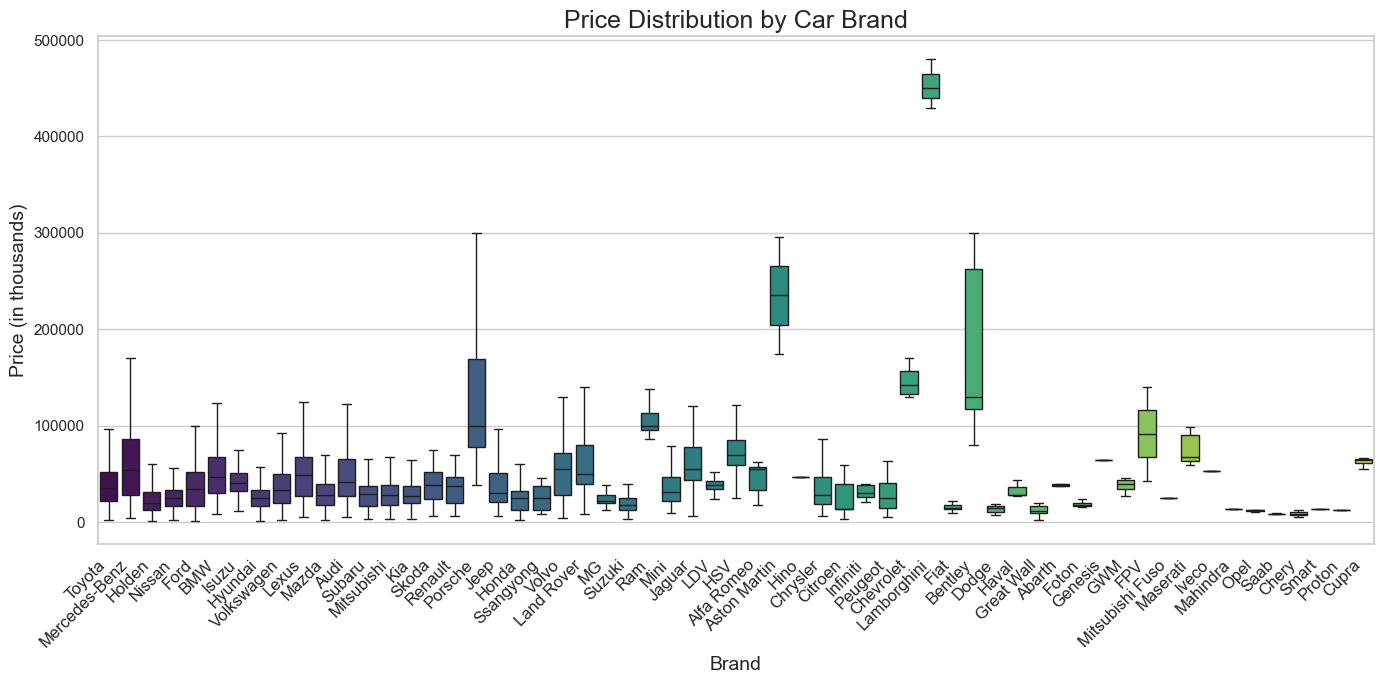

/var/folders/pf/p6mgdxlj2t50mz55hcyg73vm0000gn/T/ipykernel_3291/1523319833.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Model', y='Price', data=df, showfliers=False, palette='viridis')


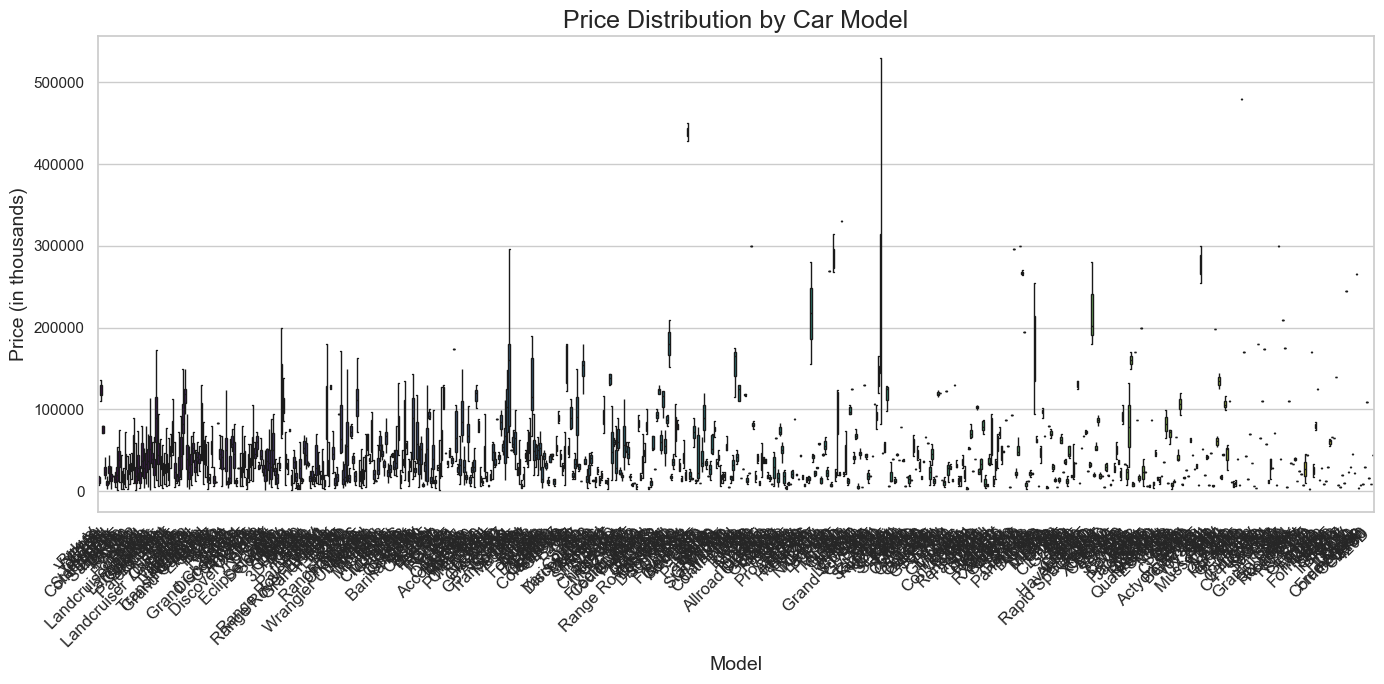

/var/folders/pf/p6mgdxlj2t50mz55hcyg73vm0000gn/T/ipykernel_3291/1523319833.py:36: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


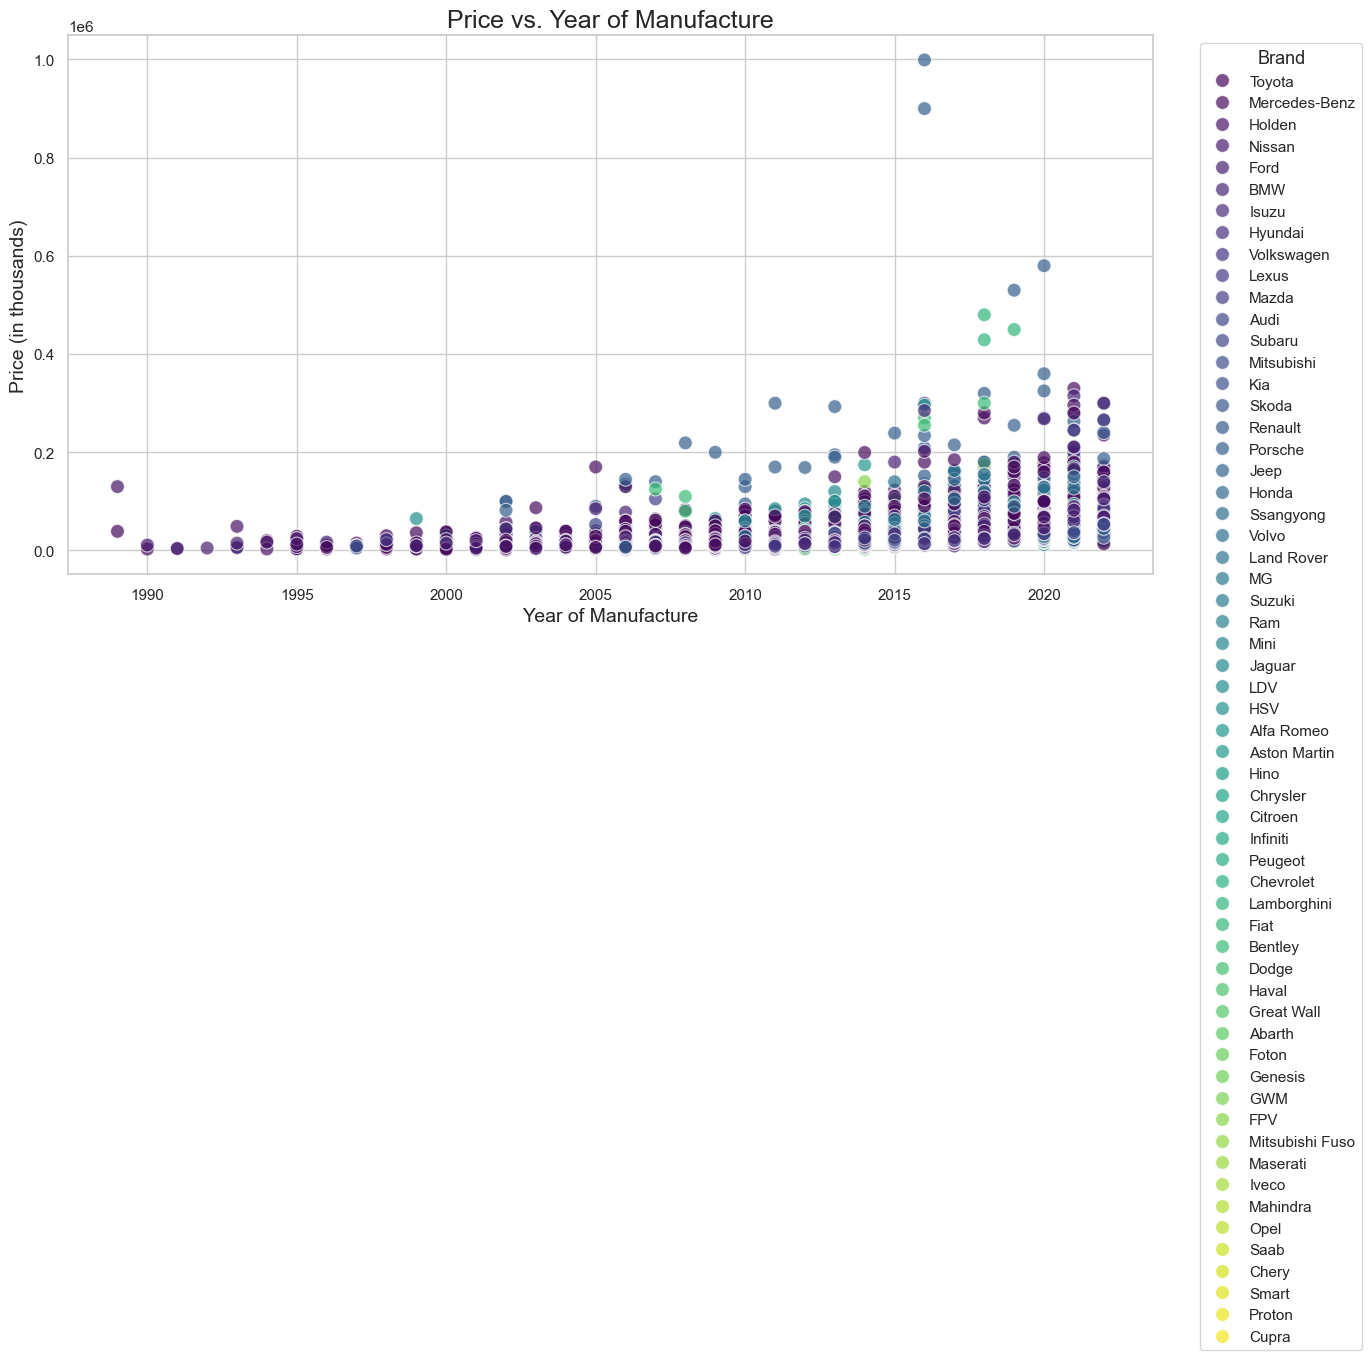

In [64]:
# Setting the general style
sns.set(style="whitegrid")

# Price distribution by brand
plt.figure(figsize=(14, 7))
sns.boxplot(x='Brand', y='Price', data=df, showfliers=False, palette='viridis')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.title('Price Distribution by Car Brand', fontsize=18)
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Price (in thousands)', fontsize=14)
plt.tight_layout()
plt.show()

# Price distribution by model
plt.figure(figsize=(14, 7))
sns.boxplot(x='Model', y='Price', data=df, showfliers=False, palette='viridis')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.title('Price Distribution by Car Model', fontsize=18)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Price (in thousands)', fontsize=14)
plt.tight_layout()
plt.show()

# Price vs. Year of Manufacture
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Year', y='Price', data=df, hue='Brand', palette='viridis', s=100, edgecolor='w', alpha=0.7)
plt.title('Price vs. Year of Manufacture', fontsize=18)
plt.xlabel('Year of Manufacture', fontsize=14)
plt.ylabel('Price (in thousands)', fontsize=14)

# Placing the legend outside the plot
plt.legend(title='Brand', title_fontsize='13', fontsize='11', loc='upper right', bbox_to_anchor=(1.20, 1))
plt.tight_layout()
plt.show()

In [65]:
# 1. Reduced price distribution by car brands
def analyze_price_by_brand(df, top_n=5):
    brand_price_stats = df.groupby('Brand')['Price'].describe().sort_values(by='50%', ascending=False).head(top_n)
    
    # Displaying the median price and minimum/maximum values for the top N brands
    for brand, stats in brand_price_stats.iterrows():
        print(f"Brand: {brand}")
        print(f"Median price: {stats['50%']:.2f}")
        print(f"Min: {stats['min']:.2f}, Max: {stats['max']:.2f}")
        print("-" * 50)

# 2. Reduced price distribution by car models
def analyze_price_by_model(df, top_n=5):
    model_price_stats = df.groupby('Model')['Price'].describe().sort_values(by='50%', ascending=False).head(top_n)
    
    # Displaying the median price and minimum/maximum values for the top N models
    for model, stats in model_price_stats.iterrows():
        print(f"Model: {model}")
        print(f"Median price: {stats['50%']:.2f}")
        print(f"Min: {stats['min']:.2f}, Max: {stats['max']:.2f}")
        print("-" * 50)

# 3. Reduced price dependency by year of release
def analyze_price_by_year(df, recent_n=5):
    year_price_stats = df.groupby('Year')['Price'].describe().sort_index(ascending=False).head(recent_n)

    # Displaying the median price and minimum/maximum values for the recent N years
    for year, stats in year_price_stats.iterrows():
        print(f"Year of release: {year}")
        print(f"Median price: {stats['50%']:.2f}")
        print(f"Min: {stats['min']:.2f}, Max: {stats['max']:.2f}")
        print("-" * 50)

# Example function calls
analyze_price_by_brand(df, top_n=5)
analyze_price_by_model(df, top_n=5)
analyze_price_by_year(df, recent_n=5)

Brand: Lamborghini
Median price: 449900.00
Min: 428990.00, Max: 479880.00
--------------------------------------------------
Brand: Aston Martin
Median price: 235120.00
Min: 174490.00, Max: 295750.00
--------------------------------------------------
Brand: Chevrolet
Median price: 141990.00
Min: 129990.00, Max: 170000.00
--------------------------------------------------
Brand: Bentley
Median price: 129990.00
Min: 79888.00, Max: 299980.00
--------------------------------------------------
Brand: Porsche
Median price: 99990.00
Min: 37990.00, Max: 999000.00
--------------------------------------------------
Model: Huracan
Median price: 479880.00
Min: 479880.00, Max: 479880.00
--------------------------------------------------
Model: Urus
Median price: 439445.00
Min: 428990.00, Max: 449900.00
--------------------------------------------------
Model: GT
Median price: 329999.00
Min: 329999.00, Max: 329999.00
--------------------------------------------------
Model: RS 6
Median price: 299990

### Summary:

### 1. **Car Brands**:
- **Lamborghini** leads with the highest median price of $449,900, followed by **Aston Martin** at $235,120. 
- **Chevrolet** and **Bentley** have median prices of $141,990 and $129,990, but Bentley shows significant price variation.
- **Porsche** has a median price of $99,990 with a wide price range, likely due to model diversity.

### 2. **Car Models**:
- **Lamborghini Huracan** is the most expensive model at $479,880, followed by **Urus** at $439,445.
- **Audi R8** holds a consistent price of $299,990, indicating stable demand.

### 3. **Year of Manufacture**:
- Newer cars (2022) have higher median prices ($57,850) compared to older ones, with prices decreasing progressively for earlier years. However, premium models maintain higher values.

### 4. **Price Distribution by Brand**:
- **Rolls-Royce**, **Ferrari**, and **Bentley** dominate the high-end market with wide price ranges, while **Toyota**, **Nissan**, and **Ford** maintain lower, more stable prices.

### 5. **Price vs. Year**:
- Prices increase significantly after 2010, especially for premium brands like **Tesla** and **Mercedes-Benz**, reflecting their growing market value.

### Conclusion:
Premium brands (Lamborghini, Aston Martin, Bentley) dominate the luxury segment, while newer cars, especially premium models, command higher prices. These insights are crucial for understanding market trends and positioning in the automotive industry.

#### 2. How does the mileage of a car affect its price?
The mileage of a car has a negative impact on its price. This can be illustrated using a graph and correlation calculation.

Status:  Used, Count: 16304, Share: 95.64%
Status:  Demo, Count: 387, Share: 2.27%
Status:  New In Stock, Count: 357, Share: 2.09%

Total number of cars: 17048
New cars: 0 (0.00%)
Used cars: 0 (0.00%)


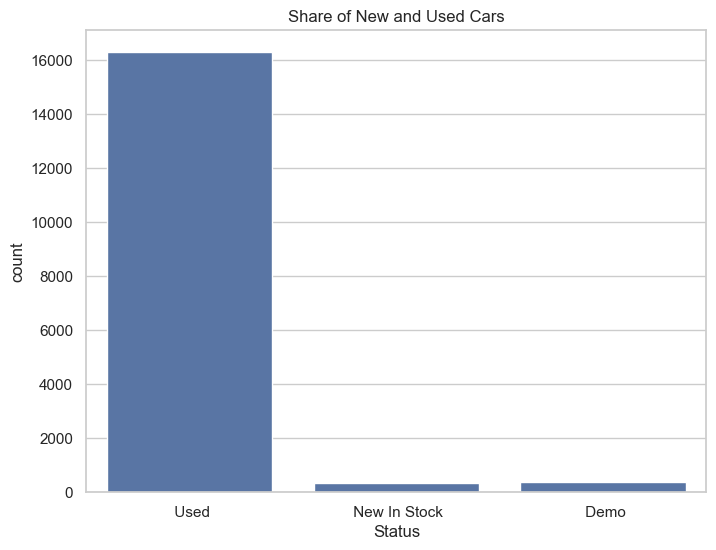

In [66]:
# Counting the share of new and used cars
status_counts = df['Status'].value_counts()
total_cars = len(df)
for status, count in status_counts.items():
    percentage = (count / total_cars) * 100
    print(f"Status: {status}, Count: {count}, Share: {percentage:.2f}%")

# Displaying results
new_cars = status_counts.get('New', 0)
used_cars = status_counts.get('Used', 0)
print(f"\nTotal number of cars: {total_cars}")
print(f"New cars: {new_cars} ({(new_cars / total_cars) * 100:.2f}%)")
print(f"Used cars: {used_cars} ({(used_cars / total_cars) * 100:.2f}%)")

# Plotting the share of new and used cars
plt.figure(figsize=(8, 6))
sns.countplot(x='Status', data=df)
plt.title('Share of New and Used Cars')
plt.show()

Conclusion:

The vast majority of cars in the dataset are used cars (95.64%), which is 16,304 units. There are no new cars in the sample, but there are 387 demonstration cars, accounting for 2.27%, and 357 cars with the status of "New In Stock" (2.09%).

Thus, it can be concluded that the used car market significantly prevails over the new offers in the presented dataset.

### 🐝 Final Summary

In this project, a comprehensive analysis of the Australian car market was conducted based on data that includes various characteristics of cars, such as brand, model, year of manufacture, price, mileage, and fuel type. The main objectives were to identify key factors influencing car prices, explore the relationship between mileage and price, and segment the market based on car features.

The analysis showed that:
- The price of a car is primarily influenced by its brand, year of manufacture, mileage, and engine capacity. Newer cars and premium brands (such as Lamborghini, Aston Martin, and Bentley) have higher prices, while higher mileage leads to a decrease in price.
- Popular car brands in the Australian market are Toyota, Holden, and Ford, with body types such as wagons and hatchbacks being the most in-demand.
- Mileage has a noticeable negative impact on price, with higher mileage cars being priced lower.

Advanced data visualization techniques were used to assess price distribution, identify outliers, and segment cars based on various characteristics. Boxplots, violin plots, and heatmaps highlighted the price differences across categories such as car brands, body types, and fuel types.

A clustering model based on K-means was applied to segment the cars into groups with similar features, allowing for targeted recommendations in various market segments. Additionally, regression analysis and random forest models were developed to predict car prices with high accuracy, providing valuable insights for businesses in making pricing and marketing decisions.

The results of this analysis can be used to:
- Offer price recommendations to customers.
- Identify popular car models and body types.
- Develop marketing strategies based on customer segmentation.
- Predict car prices using machine learning models with high accuracy.

The findings of this project provide a deep understanding of the Australian car market and can help businesses make data-driven decisions to improve their operations and better meet customer needs.